# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

import torch
from rqmix import QMIXAgent
import simulate

## 1. Training

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"{device=}")

agent = QMIXAgent(
    num_agents=4,
    device=device,
    hidden_size=128,
    num_rnn_layers=1,
    qmix_embedding_size=128,
    qmix_hypernet_size=128,
    buffer_size=1000,
    batch_sequence_length=15,
    batch_size=64,
    lr=1e-4,
    gamma=0.99,
    epsilon=1.0,
    epsilon_end=0.01,
    epsilon_decay=0.9995,
    target_update_freq=1,
    tau=5e-3,
    gradient_clipping_value=10.0,
)

device=device(type='cuda')
Using QMIX agent with mixer network
DRQNNetwork(
  (feature_layer): Sequential(
    (0): Linear(in_features=42, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (gru): GRU(128, 128, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=7, bias=True)
)
MixingNetwork(
  (hyper_w1): Sequential(
    (0): Linear(in_features=949, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=512, bias=True)
  )
  (hyper_w2): Sequential(
    (0): Linear(in_features=949, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (hyper_b1): Linear(in_features=949, out_features=128, bias=True)
  (hyper_b2): Sequential(
    (0): Linear(in_features=949, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [3]:
trained_agent, all_rewards = simulate.train('train_config/config_wall_0.json', agent)


Episode 1, Step 100, Rolling reward: -4.84, Reward: -4.84, Evacuated: 0, Deactivated: 0
Episode 2, Step 100, Rolling reward: -4.75, Reward: -4.66, Evacuated: 0, Deactivated: 0
Episode 3, Step 100, Rolling reward: -4.69, Reward: -4.57, Evacuated: 0, Deactivated: 0
Episode 4, Step 100, Rolling reward: -5.03, Reward: -6.05, Evacuated: 0, Deactivated: 0
Episode 5, Step 100, Rolling reward: -5.01, Reward: -4.94, Evacuated: 0, Deactivated: 0
Episode 6, Step 100, Rolling reward: -5.12, Reward: -5.70, Evacuated: 0, Deactivated: 0
Episode 7, Step 100, Rolling reward: -5.21, Reward: -5.73, Evacuated: 0, Deactivated: 0
Episode 8, Step 100, Rolling reward: -5.23, Reward: -5.35, Evacuated: 0, Deactivated: 0
Episode 9, Step 100, Rolling reward: -5.31, Reward: -5.94, Evacuated: 0, Deactivated: 0
Episode 10, Step 100, Rolling reward: -5.36, Reward: -5.87, Evacuated: 0, Deactivated: 0
Episode 11, Step 100, Rolling reward: -5.36, Reward: -4.79, Evacuated: 0, Deactivated: 0
Episode 12, Step 100, Rolling

In [4]:
trained_agent, all_rewards = simulate.train('train_config/config_wall_1.json', trained_agent)


Episode 1, Step 32, Rolling reward: -750.06, Reward: -750.06, Evacuated: 1, Deactivated: 3
Episode 2, Step 100, Rolling reward: -1280.24, Reward: -1810.42, Evacuated: 1, Deactivated: 2
Episode 3, Step 100, Rolling reward: -1640.55, Reward: -2361.19, Evacuated: 0, Deactivated: 3
Episode 4, Step 100, Rolling reward: -1223.23, Reward: 28.74, Evacuated: 3, Deactivated: 0
Episode 5, Step 83, Rolling reward: -1222.91, Reward: -1221.65, Evacuated: 1, Deactivated: 3
Episode 6, Step 34, Rolling reward: -1157.46, Reward: -830.19, Evacuated: 1, Deactivated: 3
Episode 7, Step 100, Rolling reward: -987.90, Reward: 29.48, Evacuated: 3, Deactivated: 0
Episode 8, Step 21, Rolling reward: -918.16, Reward: -430.00, Evacuated: 0, Deactivated: 4
Episode 9, Step 33, Rolling reward: -902.84, Reward: -780.27, Evacuated: 1, Deactivated: 3
Episode 10, Step 14, Rolling reward: -840.57, Reward: -280.13, Evacuated: 0, Deactivated: 4
Episode 11, Step 100, Rolling reward: -863.80, Reward: -982.36, Evacuated: 0, De

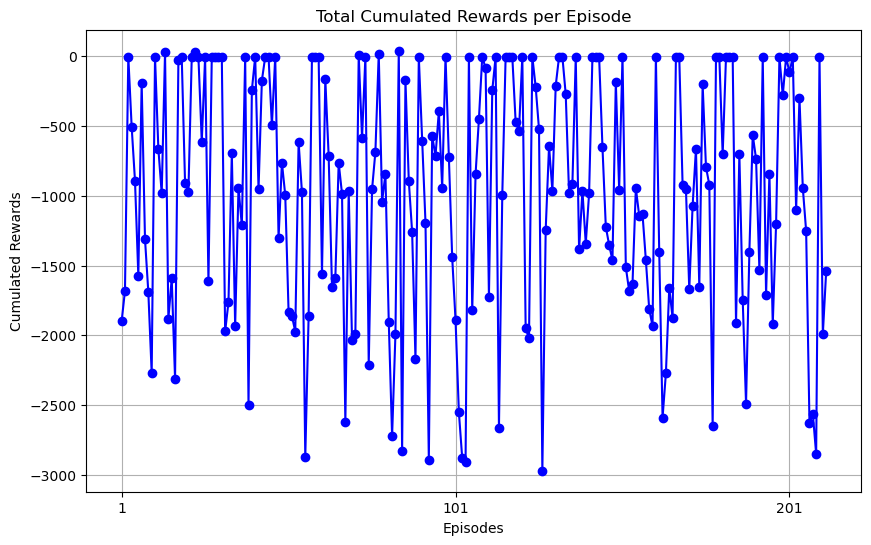

In [18]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [ ]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [ ]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)